# Customer Churn Prediction

Importing necessary files

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('/home/akarshi/Project/Codsoft/Customer Churn Prediction/Churn_Modelling.csv')

# Exploratory Data Analysis

In [3]:
data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.shape

(10000, 14)

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
features = data.columns
for feature in features:
     print(f'{feature}--->{data[feature].nunique()}')


RowNumber--->10000
CustomerId--->10000
Surname--->2932
CreditScore--->460
Geography--->3
Gender--->2
Age--->70
Tenure--->11
Balance--->6382
NumOfProducts--->4
HasCrCard--->2
IsActiveMember--->2
EstimatedSalary--->9999
Exited--->2


# Data Visualization

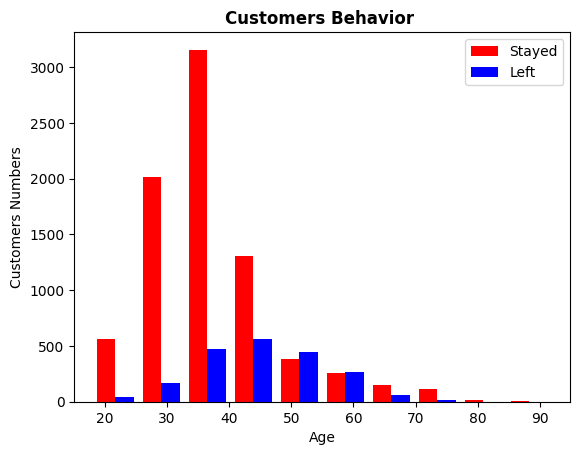

In [8]:
Customer_Stayed=data[data['Exited']==0].Age
Customer_Left=data[data['Exited']==1].Age
plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Left], color=['red','blue'],label=['Stayed','Left'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()


# Data Model Building

 Spliiting the data in Training and Test Data

In [9]:
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
categorical_cols = ['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', ]
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [11]:
# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [12]:
# Build and train Logistic Regression classifier
lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Build and train Random Forest classifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Build and train Gradient Boosting classifier
gb_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())])
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [13]:
classifiers = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]


In [14]:
for name, y_pred in classifiers:
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression
Accuracy: 0.8055
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1585
           1       0.59      0.21      0.31       415

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.77      0.81      0.77      2000

[[1523   62]
 [ 327   88]]


Random Forest
Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1585
           1       0.92      0.27      0.42       415

    accuracy                           0.84      2000
   macro avg       0.88      0.63      0.66      2000
weighted avg       0.86      0.84      0.81      2000

[[1575   10]
 [ 303  112]]


Gradient Boosting
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.43      0.56       415

    accuracy           

It was concluded that Gradient Boosting was giving us the best_score in the dataset